In [1]:
import warnings
warnings.filterwarnings("ignore")

from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:52329 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [2]:
from dask import delayed

@delayed
def sum(x, y):
    return x + y

@delayed
def sum_and_squared(x, y):
    return (x+y)**2

In [3]:
from dask import delayed

@delayed
def sum_up(l): #takes a list of numbers as input
    return sum(l)

@delayed
def cube(n):
    return n**3

total = []
for i in range(1,5):
    total.append(cube(i))

total_sum = sum_up(1)
total_sum

Delayed('sum_up-889b6335-f60f-4e78-9e6c-a4719350c47b')

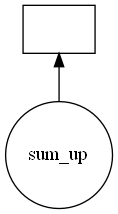

In [4]:
total_sum.visualize()

In [5]:
total_sum.compute()

Delayed('sum-b97abf3c-50e3-416c-b1c0-5197a240e5c6')

In [6]:
# first two fibonacci numbers
from dask import delayed

fibonacci_nums = [1,1]

# returns the nth fibonacci number
@delayed
def get_nth_fibonacci_number(n):
    if n == 1:
        return fibonacci_nums[0]
    elif n == 2:
        return fibonacci_nums[1]
    else:
        return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

fib = get_nth_fibonacci_number(10)
fib

Delayed('get_nth_fibonacci_number-1484d28a-a7ee-4079-a7b0-9c310d8ea890')

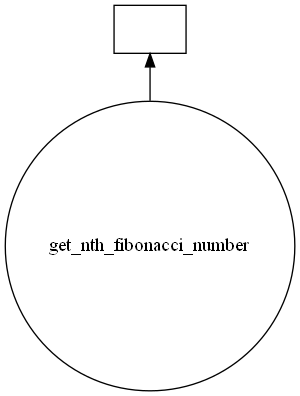

In [7]:
fib.visualize()

In [8]:
fib.compute()

Delayed('add-1edbdb65ca1a4dc7678349215a835012')

In [9]:
client.close()